In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

# Web Scraping

In [ ]:
url_list = ['https://www.basketball-reference.com/leagues/NBA_2023_games-october.html',
            'https://www.basketball-reference.com/leagues/NBA_2023_games-november.html',
            'https://www.basketball-reference.com/leagues/NBA_2023_games-december.html',
            'https://www.basketball-reference.com/leagues/NBA_2023_games-january.html',
            'https://www.basketball-reference.com/leagues/NBA_2023_games-february.html',
            'https://www.basketball-reference.com/leagues/NBA_2023_games-march.html',
            'https://www.basketball-reference.com/leagues/NBA_2023_games-april.html',
            'https://www.basketball-reference.com/leagues/NBA_2023_games-may.html',
            'https://www.basketball-reference.com/leagues/NBA_2023_games-june.html'
           ]

raw = pd.DataFrame()

# Loop para acessar cada URL e extrair os dados
for url in url_list:
    # Enviar uma solicitação GET para a página
    response = requests.get(url)

    # Verificar se a solicitação foi bem-sucedida
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')


        # Encontrar a tabela de jogos
        table = soup.find('table', {'id': 'schedule'})

        # Extrair os cabeçalhos da tabela
        headers = table.find('thead').find_all('th')
        header_row = [header.text.strip() for header in headers]

        # Extrair os dados da tabela
        data = []
        rows = table.find('tbody').find_all('tr')
        for row in rows:
            cells = row.find_all(['th', 'td'])
            row_data = [cell.text.strip() for cell in cells]
            if row_data:
                data.append(row_data)

        # Criar o DataFrame
        df = pd.DataFrame(data, columns=header_row)
        raw = pd.concat([raw, df]).reset_index(drop=True)

    else:
        print('Falha ao acessar a página: ', url)

raw.to_csv('/content/drive/MyDrive/PI3/2023_NBA_games.csv')

In [ ]:
import glob

folder_path = '/content/drive/MyDrive/PI3/Fixed/'

# Obter uma lista de todos os arquivos CSV na pasta
csv_files = glob.glob(folder_path + '*.csv')



# Lista para armazenar os dataframes
dfs = []

# Loop para ler cada arquivo CSV e adicionar o dataframe à lista
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)
    print(csv_file)


# Concatenar os dataframes em um único dataframe
all_NBA_games = pd.concat(dfs)

# Salvar o dataframe resultante em um novo arquivo CSV
all_NBA_games.to_csv(folder_path + 'NBA_games_fixed.csv', index=False)


# Arrumando os arquivos

In [ ]:
jogos_2010 = pd.read_csv('/content/drive/MyDrive/PI3/2010_NBA_games.csv')
jogos_2011 = pd.read_csv('/content/drive/MyDrive/PI3/2011_NBA_games.csv')
jogos_2012 = pd.read_csv('/content/drive/MyDrive/PI3/2012_NBA_games.csv')
jogos_2013 = pd.read_csv('/content/drive/MyDrive/PI3/2013_NBA_games.csv')
jogos_2014 = pd.read_csv('/content/drive/MyDrive/PI3/2014_NBA_games.csv')
jogos_2015 = pd.read_csv('/content/drive/MyDrive/PI3/2015_NBA_games.csv')
jogos_2016 = pd.read_csv('/content/drive/MyDrive/PI3/2016_NBA_games.csv')
jogos_2017 = pd.read_csv('/content/drive/MyDrive/PI3/2017_NBA_games.csv')
jogos_2018 = pd.read_csv('/content/drive/MyDrive/PI3/2018_NBA_games.csv')
jogos_2019 = pd.read_csv('/content/drive/MyDrive/PI3/2019_NBA_games.csv')
jogos_2020 = pd.read_csv('/content/drive/MyDrive/PI3/2020_NBA_games.csv')
jogos_2021 = pd.read_csv('/content/drive/MyDrive/PI3/2021_NBA_games.csv')
jogos_2022 = pd.read_csv('/content/drive/MyDrive/PI3/2022_NBA_games.csv')
jogos_2023 = pd.read_csv('/content/drive/MyDrive/PI3/2023_NBA_games.csv')
jogos_all = pd.read_csv('/content/drive/MyDrive/PI3/NBA_games.csv')

In [ ]:
jogos_all.head(10)

,Unnamed: 0,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 7,Unnamed: 8,Attend.,Arena,Notes
0,0,"Tue, Oct 27, 2009",7:30p,Boston Celtics,95.0,Cleveland Cavaliers,89.0,Box Score,NaN,"20,562",Quicken Loans Arena,NaN
1,1,"Tue, Oct 27, 2009",8:30p,Washington Wizards,102.0,Dallas Mavericks,91.0,Box Score,NaN,"19,871",American Airlines Center,NaN
2,2,"Tue, Oct 27, 2009",10:00p,Houston Rockets,87.0,Portland Trail Blazers,96.0,Box Score,NaN,"20,403",Rose Garden Arena,NaN
3,3,"Tue, Oct 27, 2009",10:30p,Los Angeles Clippers,92.0,Los Angeles Lakers,99.0,Box Score,NaN,"18,997",STAPLES Center,NaN
4,4,"Wed, Oct 28, 2009",7:00p,Indiana Pacers,109.0,Atlanta Hawks,120.0,Box Score,NaN,"17,998",Philips Arena,NaN
5,5,"Wed, Oct 28, 2009",7:00p,Cleveland Cavaliers,91.0,Toronto Raptors,101.0,Box Score,NaN,"20,152",Air Canada Centre,NaN
6,6,"Wed, Oct 28, 2009",7:00p,Philadelphia 76ers,106.0,Orlando Magic,120.0,Box Score,NaN,"17,461",Amway Arena,NaN
7,7,"Wed, Oct 28, 2009",7:30p,Charlotte Bobcats,59.0,Boston Celtics,92.0,Box Score,NaN,"18,624",TD Garden,NaN
8,8,"Wed, Oct 28, 2009",7:30p,New York Knicks,93.0,Miami Heat,115.0,Box Score,NaN,"19,600",AmericanAirlines Arena,NaN
9,9,"Wed, Oct 28, 2009",8:00p,Sacramento Kings,89.0,Oklahoma City Thunder,102.0,Box Score,NaN,"18,203",Oklahoma City Arena,NaN


In [ ]:
dataframes = ['jogos_2010', 'jogos_2011', 'jogos_2012', 'jogos_2013', 'jogos_2014', 'jogos_2015',
              'jogos_2016', 'jogos_2017', 'jogos_2018', 'jogos_2019', 'jogos_2020', 'jogos_2021',
              'jogos_2022', 'jogos_2023', 'jogos_all']

for df_name in dataframes:
  df = globals()[df_name]
  df.drop(['Unnamed: 0', 'Unnamed: 7', 'Notes'], axis=1, inplace=True)
  df.rename(columns={'Start (ET)': 'Start_time'}, inplace=True)
  df.rename(columns={'Visitor/Neutral': 'Visitor'}, inplace=True)
  df.rename(columns={'Home/Neutral': 'Home'}, inplace=True)
  df.rename(columns={'Attend.': 'Attendance'}, inplace=True)
  df.rename(columns={'PTS': 'PTS (V)'}, inplace=True)
  df.rename(columns={'PTS.1': 'PTS (H)'}, inplace=True)
  df.rename(columns={'Unnamed: 8': 'OT'}, inplace=True)
  df.drop(df[df['Date'].str.contains('Playoffs', case=False)].index, inplace=True)
  df['Date'] = pd.to_datetime(df['Date'], format='%a, %b %d, %Y').dt.strftime('%Y/%m/%d')
  df['Week_Day'] = pd.to_datetime(df['Date'], format='%Y/%m/%d').dt.day_name()


In [ ]:
jogos_all.head()

,Unnamed: 0,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 7,Unnamed: 8,Attend.,Arena,Notes
0,0,"Tue, Oct 27, 2009",7:30p,Boston Celtics,95.0,Cleveland Cavaliers,89.0,Box Score,NaN,"20,562",Quicken Loans Arena,NaN
1,1,"Tue, Oct 27, 2009",8:30p,Washington Wizards,102.0,Dallas Mavericks,91.0,Box Score,NaN,"19,871",American Airlines Center,NaN
2,2,"Tue, Oct 27, 2009",10:00p,Houston Rockets,87.0,Portland Trail Blazers,96.0,Box Score,NaN,"20,403",Rose Garden Arena,NaN
3,3,"Tue, Oct 27, 2009",10:30p,Los Angeles Clippers,92.0,Los Angeles Lakers,99.0,Box Score,NaN,"18,997",STAPLES Center,NaN
4,4,"Wed, Oct 28, 2009",7:00p,Indiana Pacers,109.0,Atlanta Hawks,120.0,Box Score,NaN,"17,998",Philips Arena,NaN


In [ ]:
#jogos_2010.to_csv('/content/drive/MyDrive/PI3/Fixed/2010_NBA_games_fixed.csv', index=False)
#jogos_2011.to_csv('/content/drive/MyDrive/PI3/Fixed/2011_NBA_games_fixed.csv', index=False)
#jogos_2012.to_csv('/content/drive/MyDrive/PI3/Fixed/2012_NBA_games_fixed.csv', index=False)
#jogos_2013.to_csv('/content/drive/MyDrive/PI3/Fixed/2013_NBA_games_fixed.csv', index=False)
#jogos_2014.to_csv('/content/drive/MyDrive/PI3/Fixed/2014_NBA_games_fixed.csv', index=False)
#jogos_2015.to_csv('/content/drive/MyDrive/PI3/Fixed/2015_NBA_games_fixed.csv', index=False)
#jogos_2016.to_csv('/content/drive/MyDrive/PI3/Fixed/2016_NBA_games_fixed.csv', index=False)
#jogos_2017.to_csv('/content/drive/MyDrive/PI3/Fixed/2017_NBA_games_fixed.csv', index=False)
#jogos_2018.to_csv('/content/drive/MyDrive/PI3/Fixed/2018_NBA_games_fixed.csv', index=False)
#jogos_2019.to_csv('/content/drive/MyDrive/PI3/Fixed/2019_NBA_games_fixed.csv', index=False)
#jogos_2020.to_csv('/content/drive/MyDrive/PI3/Fixed/2020_NBA_games_fixed.csv', index=False)
#jogos_2021.to_csv('/content/drive/MyDrive/PI3/Fixed/2021_NBA_games_fixed.csv', index=False)
#jogos_2022.to_csv('/content/drive/MyDrive/PI3/Fixed/2022_NBA_games_fixed.csv', index=False)
#jogos_2023.to_csv('/content/drive/MyDrive/PI3/Fixed/2023_NBA_games_fixed.csv', index=False)
#jogos_all.to_csv('/content/drive/MyDrive/PI3/Fixed/NBA_games_fixed.csv', index=False)

# Análise


In [ ]:
f_2010 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2010_NBA_games_fixed.csv')
f_2011 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2011_NBA_games_fixed.csv')
f_2012 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2012_NBA_games_fixed.csv')
f_2013 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2013_NBA_games_fixed.csv')
f_2014 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2014_NBA_games_fixed.csv')
f_2015 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2015_NBA_games_fixed.csv')
f_2016 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2016_NBA_games_fixed.csv')
f_2017 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2017_NBA_games_fixed.csv')
f_2018 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2018_NBA_games_fixed.csv')
f_2019 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2019_NBA_games_fixed.csv')
f_2020 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2020_NBA_games_fixed.csv')
f_2021 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2021_NBA_games_fixed.csv')
f_2022 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2022_NBA_games_fixed.csv')
f_2023 = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/2023_NBA_games_fixed.csv')
all = pd.read_csv('/content/drive/MyDrive/PI3/Fixed/NBA_games_fixed.csv')

In [ ]:
all.head()

,Date,Start_time,Visitor,PTS (V),Home,PTS (H),OT,Attendance,Arena,Week_Day
0,2009/10/27,7:30p,Boston Celtics,95.0,Cleveland Cavaliers,89.0,NaN,"20,562",Quicken Loans Arena,Tuesday
1,2009/10/27,8:30p,Washington Wizards,102.0,Dallas Mavericks,91.0,NaN,"19,871",American Airlines Center,Tuesday
2,2009/10/27,10:00p,Houston Rockets,87.0,Portland Trail Blazers,96.0,NaN,"20,403",Rose Garden Arena,Tuesday
3,2009/10/27,10:30p,Los Angeles Clippers,92.0,Los Angeles Lakers,99.0,NaN,"18,997",STAPLES Center,Tuesday
4,2009/10/28,7:00p,Indiana Pacers,109.0,Atlanta Hawks,120.0,NaN,"17,998",Philips Arena,Wednesday


In [ ]:
all_dfs = [f_2010, f_2011, f_2012, f_2013, f_2014, f_2015, f_2016, f_2017, f_2018, f_2019, f_2020, f_2021, f_2022, f_2023]
for row in all:
  all['PTS_T'] = all['PTS (V)'] + all['PTS (H)']
for rows in all:
  all['Game'] = all['Visitor'] + ' X ' + all['Home']

In [ ]:
for i, value in enumerate(all['Attendance']):
    if isinstance(value, str):
        all['Attendance'][i] = float(value.replace(',', ''))


<ipython-input-26-8cfe63d2ae91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all['Attendance'][i] = float(value.replace(',', ''))


In [ ]:
all['Attendance'] = all['Attendance'].astype(float)  # Convertendo a coluna em tipo float
top_attendance = all.nlargest(2, 'Attendance')  # Obtendo as 5 linhas com maiores valores de Attendance
print(top_attendance)


             Date Start_time                Visitor  PTS (V)  \
17161  2023/01/13      7:30p  Golden State Warriors    144.0   
8274   2016/01/20      8:00p  Golden State Warriors    125.0   

                    Home  PTS (H)   OT  Attendance          Arena   Week_Day  \
17161  San Antonio Spurs    113.0  NaN     68323.0      Alamodome     Friday   
8274       Chicago Bulls     94.0  NaN     23152.0  United Center  Wednesday   

       PTS_T                                       Game  
17161  257.0  Golden State Warriors X San Antonio Spurs  
8274   219.0      Golden State Warriors X Chicago Bulls  


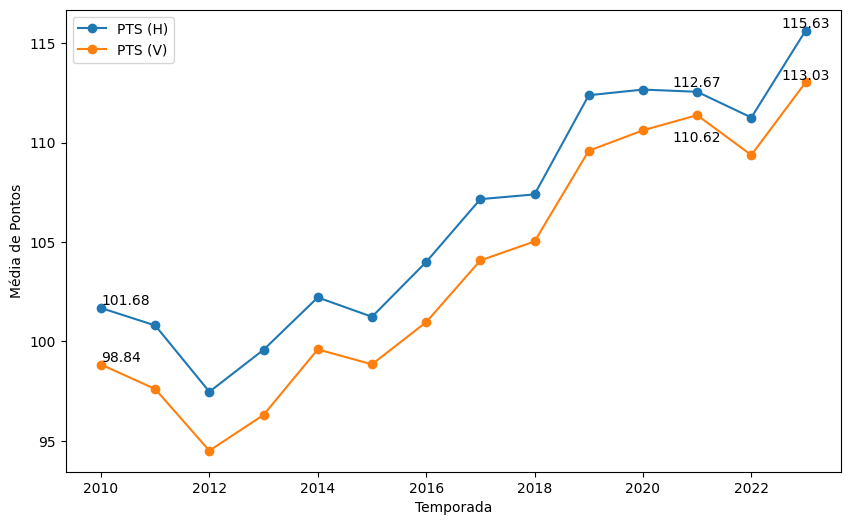

In [ ]:
# Listas vazias para armazenar as médias
medias_pontos_casa = []
medias_pontos_visitante = []

# Calculando as médias para cada data frame
for df in all_dfs:
    media_pontos_casa = df["PTS (H)"].mean()
    media_pontos_visitante = df["PTS (V)"].mean()
    medias_pontos_casa.append(media_pontos_casa)
    medias_pontos_visitante.append(media_pontos_visitante)

# Gerando o gráfico de linha
anos = list(range(2010, 2024))
plt.figure(figsize=(10, 6))
plt.plot(anos, medias_pontos_casa, label="PTS (H)", marker='o')
plt.plot(anos, medias_pontos_visitante, label="PTS (V)", marker='o')

plt.xlabel("Temporada")
plt.ylabel("Média de Pontos")

# Valor das médias do primeiro e último ano
primeiro_ano = anos[0]
ultimo_ano = anos[-1]
primeira_media_casa = medias_pontos_casa[0]
primeira_media_visitante = medias_pontos_visitante[0]
ultima_media_casa = medias_pontos_casa[-1]
ultima_media_visitante = medias_pontos_visitante[-1]

plt.text(primeiro_ano, primeira_media_casa, str(round(primeira_media_casa, 2)), ha="left", va="bottom", color="black")
plt.text(primeiro_ano, primeira_media_visitante, str(round(primeira_media_visitante, 2)), ha="left", va="bottom", color="black")
plt.text(ultimo_ano, ultima_media_casa, str(round(ultima_media_casa, 2)), ha="center", va="bottom", color="black")
plt.text(ultimo_ano, ultima_media_visitante, str(round(ultima_media_visitante, 2)), ha="center", va="bottom", color="black")

# Média dos pontos em 2021
media_pontos_casa_2021 = medias_pontos_casa[anos.index(2021 - 1)]
media_pontos_visitante_2021 = medias_pontos_visitante[anos.index(2021 - 1)]

plt.text(2021, media_pontos_casa_2021, str(round(media_pontos_casa_2021, 2)), ha="center", va="bottom", color="black")
plt.text(2021, media_pontos_visitante_2021, str(round(media_pontos_visitante_2021, 2)), ha="center", va="top", color="black")

# Mostrar o gráfico
plt.legend()
plt.show()

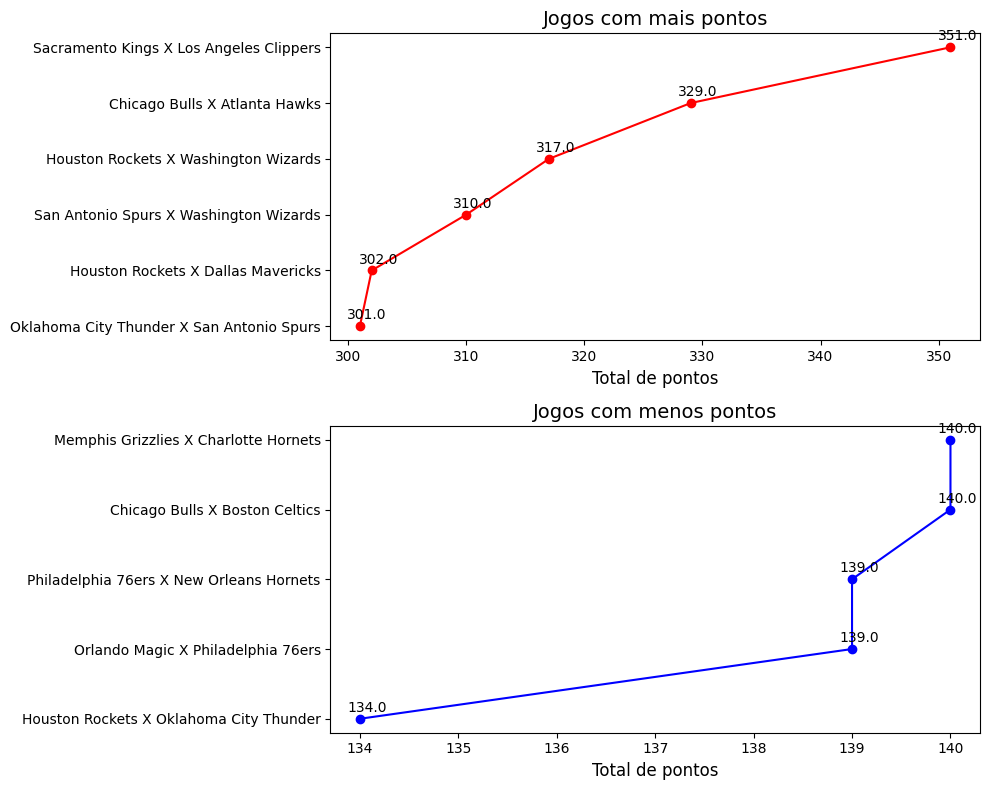

In [ ]:
# Selecionar as 6 primeiras e últimas 5 linhas com base na coluna 'PTS_T'
PTS_300 = all.sort_values(by='PTS_T', ascending=False).head(6)
PTS_140 = all.sort_values(by='PTS_T', ascending=False).tail(5)

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de linha para PTS_300
ax1.plot(PTS_300['PTS_T'], PTS_300['Game'], marker='o', color='red', label='PTS_300')
ax1.set_xlabel('Total de pontos', fontsize=12)
ax1.set_title('Jogos com mais pontos', fontsize=14)

# Adicionar nomes em PTS_300
for index, row in PTS_300.iterrows():
    ax1.annotate(row['PTS_T'], (row['PTS_T'], row['Game']),
                  xytext=(5, 5), textcoords='offset points', ha='center', fontsize=10)

# Gráfico de linha para PTS_140
ax2.plot(PTS_140['PTS_T'], PTS_140['Game'], marker='o', color='blue', label='PTS_140')
ax2.set_xlabel('Total de pontos', fontsize=12)
ax2.set_title('Jogos com menos pontos', fontsize=14)

# Adicionar nomes em PTS_140
for index, row in PTS_140.iterrows():
    ax2.annotate(row['PTS_T'], (row['PTS_T'], row['Game']),
                  xytext=(5, 5), textcoords='offset points', ha='center', fontsize=10)

# Inverter o eixo y para gráficos de linha horizontais
ax1.invert_yaxis()
ax2.invert_yaxis()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [ ]:
PTS_300
#PTS_140.Date

,Date,Start_time,Visitor,PTS (V),Home,PTS (H),OT,Attendance,Arena,Week_Day,PTS_T,Game
17427,2023/02/24,10:30p,Sacramento Kings,176.0,Los Angeles Clippers,175.0,2OT,"19,068",Crypto.com Arena,Friday,351.0,Sacramento Kings X Los Angeles Clippers
12505,2019/03/01,7:30p,Chicago Bulls,168.0,Atlanta Hawks,161.0,4OT,"15,267",State Farm Arena,Friday,329.0,Chicago Bulls X Atlanta Hawks
12951,2019/10/30,8:00p,Houston Rockets,159.0,Washington Wizards,158.0,NaN,"20,476",Capital One Arena,Wednesday,317.0,Houston Rockets X Washington Wizards
16097,2022/02/25,7:00p,San Antonio Spurs,157.0,Washington Wizards,153.0,2OT,"15,302",Capital One Arena,Friday,310.0,San Antonio Spurs X Washington Wizards
13868,2020/07/31,9:00p,Houston Rockets,153.0,Dallas Mavericks,149.0,OT,NaN,The Arena,Friday,302.0,Houston Rockets X Dallas Mavericks
12196,2019/01/10,9:30p,Oklahoma City Thunder,147.0,San Antonio Spurs,154.0,2OT,"18,354",AT&T Center,Thursday,301.0,Oklahoma City Thunder X San Antonio Spurs


In [ ]:
all.Date.value_counts().head(9)

2022-11-07    15
2023-04-09    15
2014-04-16    15
2021-05-16    15
2016-11-25    15
2022-04-10    15
2013-04-17    15
2011-04-13    15
2013-03-27    14
Name: Date, dtype: int64

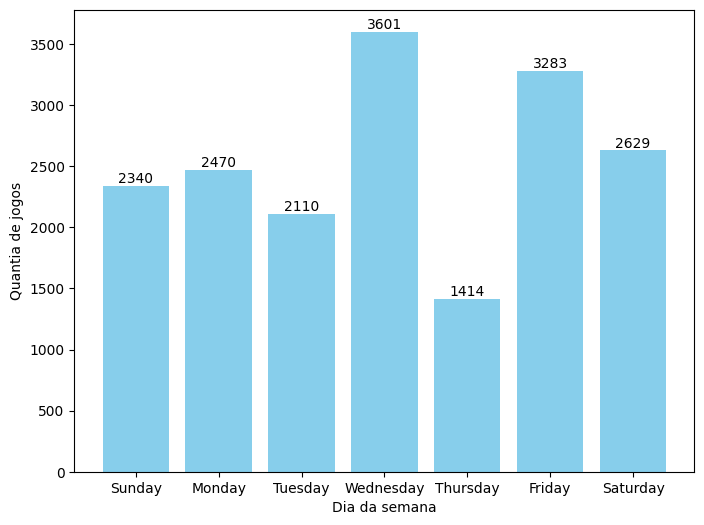

In [ ]:
# Criando a figura
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
weekday_counts = all['Week_Day'].value_counts().sort_index()

# Reordenando os dias
weekday_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_counts = weekday_counts.reindex(weekday_names)

plt.bar(weekday_names, weekday_counts, color='skyblue')

# Adicionando as quantias de dias no topo das barras
for i, count in enumerate(weekday_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

# Nomeando os eixos
plt.xlabel('Dia da semana')
plt.ylabel('Quantia de jogos')


plt.show()